Saving Titanic-Dataset.csv to Titanic-Dataset (3).csv


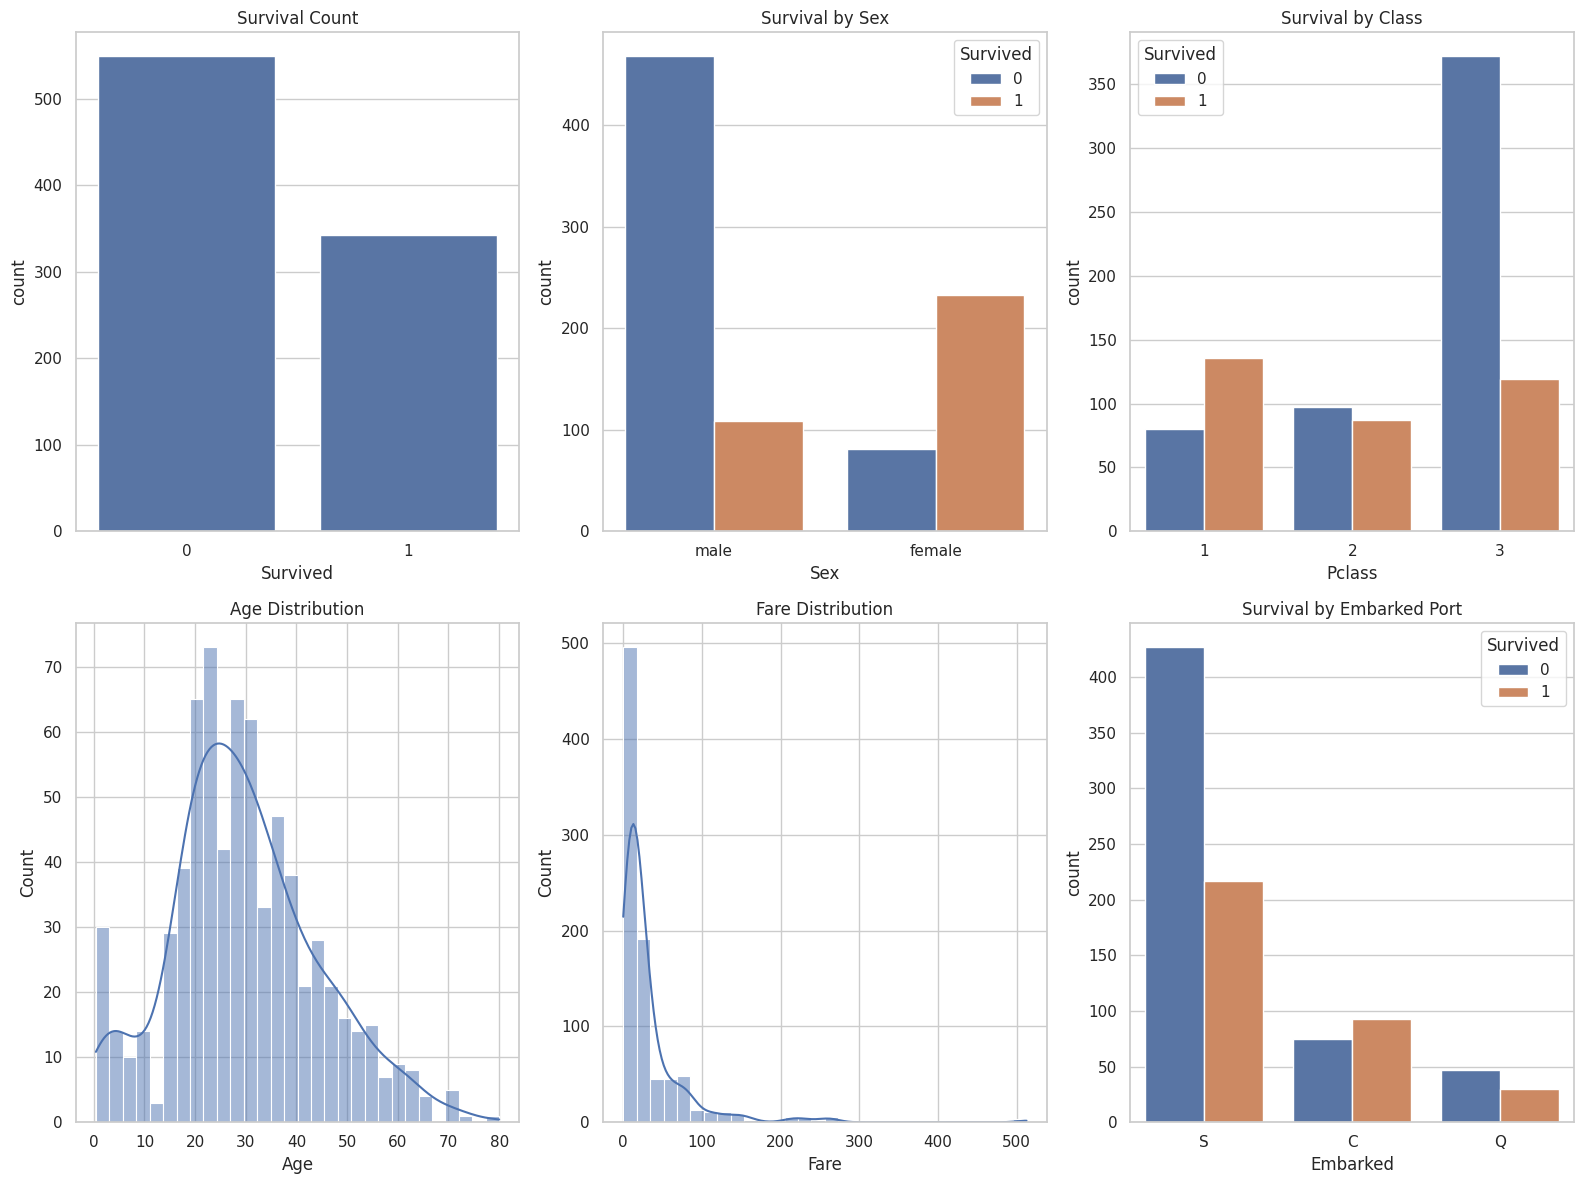

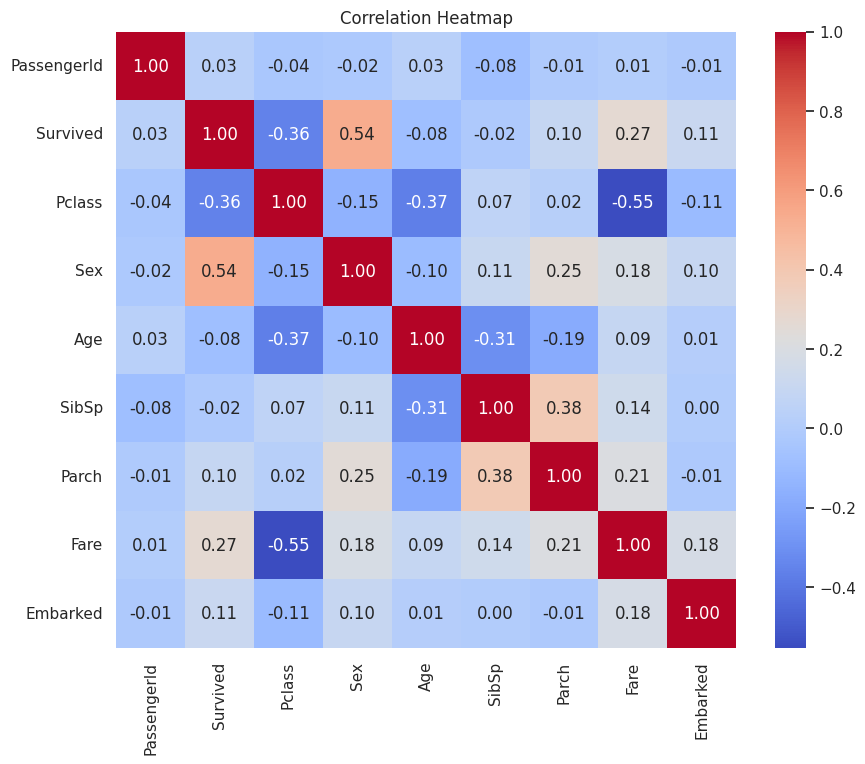

Accuracy: 0.8156424581005587

Confusion Matrix:
 [[91 14]
 [19 55]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179

Survived


In [ ]:
#TAST 1
from google.colab import files
uploaded = files.upload()  # Upload your Titanic CSV file here


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

sns.set(style="whitegrid")


df = pd.read_csv("Titanic-Dataset.csv")  # Use the uploaded filename
df.head()

plt.figure(figsize=(16, 12))

plt.subplot(2, 3, 1)
sns.countplot(data=df, x='Survived')
plt.title('Survival Count')

plt.subplot(2, 3, 2)
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Survival by Sex')

plt.subplot(2, 3, 3)
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Survival by Class')

plt.subplot(2, 3, 4)
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')

plt.subplot(2, 3, 5)
sns.histplot(df['Fare'], bins=30, kde=True)
plt.title('Fare Distribution')

plt.subplot(2, 3, 6)
sns.countplot(data=df, x='Embarked', hue='Survived')
plt.title('Survival by Embarked Port')

plt.tight_layout()
plt.show()





df_corr = df.copy()
df_corr['Sex'] = df_corr['Sex'].map({'male': 0, 'female': 1})
df_corr['Embarked'] = df_corr['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
df_corr = df_corr.drop(columns=['Name', 'Ticket', 'Cabin'])
df_corr = df_corr.dropna()

plt.figure(figsize=(10, 8))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()



df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

# Encode categorical columns
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Impute missing values
imputer = SimpleImputer(strategy='mean')
df['Age'] = imputer.fit_transform(df[['Age']])
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

df.head()


X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Example passenger data in the correct order of features
new_passenger = pd.DataFrame([{
    'Pclass': 3,
    'Sex': 0,  # male
    'Age': 22,
    'SibSp': 1,
    'Parch': 0,
    'Fare': 7.25,
    'Embarked': 0  # S
}])

# Predict survival
prediction = model.predict(new_passenger)

# Output result
print("Survived" if prediction[0] == 1 else "Did not survive")

